# GDI query

Let's now execute some queries on this data. First we'll connect to the project.

In [1]:
from pathlib import Path

import genomics_data_index.api as gdi

project_dir = Path('data/sars-cov-2-genbank-index')

db = gdi.GenomicsDataIndex.connect(project_dir)
db

/home/CSCScience.ca/apetkau/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


<GenomicsDataIndex(samples=395)>

# Load up metadata

In [66]:
import pandas as pd

metadata_df = pd.read_csv(project_dir / 'metadata.tsv', sep='\t')
metadata_df

,genbank_accession,genbank_accession.1,strain,region,location,collection_date,submitted_date,host,isolation_source,biosample_accession,...,count_ns,percent_ns,taxon,lineage,conflict,pangolin_version,pangoLEARN_version,pango_version,status,note
0,NC_045512,NC_045512,NC_045512,Asia,China,2019-12,2020-01-13T00:00:00Z,Homo sapiens,NaN,NaN,...,0,0.000000,NC_045512,B,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
1,MN908947,MN908947,MN908947,Asia,China,2019-12,2020-01-12T00:00:00Z,Homo sapiens,NaN,NaN,...,0,0.000000,MN908947,B,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
2,MW898809,MW898809,MW898809,Asia,Iran,2019-12-12,2021-04-12T00:00:00Z,Homo sapiens,NaN,NaN,...,0,0.000000,MW898809,B.4,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
3,MT019529,MT019529,MT019529,Asia,"China: Hubei, Wuhan",2019-12-23,2020-02-05T00:00:00Z,Homo sapiens,lung,NaN,...,0,0.000000,MT019529,B,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
4,LR757995,LR757995,LR757995,Asia,China:Wuhan,2019-12-26,2020-02-01T00:00:00Z,Homo sapiens,NaN,SAMEA6507893,...,0,0.000000,LR757995,A,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,LR860756,LR860756,LR860756,Europe,Switzerland:Graub###nden,2020,2020-07-20T00:00:00Z,Homo sapiens,NaN,SAMEA7015170,...,237,0.792563,LR860756,B.1,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
391,LR860757,LR860757,LR860757,Europe,Switzerland:Uri,2020,2020-07-20T00:00:00Z,Homo sapiens,NaN,SAMEA7015172,...,488,1.631943,LR860757,B.1,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
392,LR860758,LR860758,LR860758,Europe,Switzerland:Zurich,2020,2020-07-20T00:00:00Z,Homo sapiens,NaN,SAMEA7015167,...,398,1.330970,LR860758,B.1,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN
393,LR860759,LR860759,LR860759,Europe,Switzerland:Basel-Landschaft,2020,2020-07-20T00:00:00Z,Homo sapiens,NaN,SAMEA7015171,...,554,1.852657,LR860759,B.1,0.0,2.4.2,2021-04-28,v1.1.23,passed_qc,NaN


In [11]:
metadata_df['lineage'].value_counts()

B.1          222
B.1.1         75
B             21
B.1.128        8
B.1.93         8
B.1.1.7        7
B.1.1.70       7
C.35           6
B.1.1.372      5
B.1.146        4
B.1.356        3
B.1.610        3
B.1.91         3
B.1.1.10       2
B.40           2
B.1.1.71       2
B.1.1.1        2
B.1.8          2
B.1.1.58       2
B.1.351        2
A              2
B.1.94         1
A.2            1
B.1.1.170      1
B.1.1.142      1
B.1.1.164      1
B.1.147        1
B.4            1
Name: lineage, dtype: int64

In [39]:
metadata_df['region'].value_counts()

Europe    376
Asia       19
Name: region, dtype: int64

In [43]:
metadata_df['host'].value_counts()

Homo sapiens    395
Name: host, dtype: int64

In [65]:
metadata_df['collection_date'].value_counts()

2020          376
2019-12-30     13
2019-12         2
2019-12-26      2
2019-12-23      1
2019-12-12      1
Name: collection_date, dtype: int64

# Start query

In [3]:
reference_name = db.reference_names()[0]
reference_name

'MN996528.1-ref'

In [4]:
t = db.samples_query(universe='mutations_experimental', reference_name=reference_name).set_outgroup(reference_name)
t

<ExperimentalTreeSamplesQuery[100% (395/395) samples]>

## Join to metadata

In [8]:
q = t.join(metadata_df, sample_names_column='genbank_accession')
q

<ExperimentalTreeSamplesQuery[100% (395/395) samples]>

# Define mutations as amino acid names

I currently don't have nucleotide to amino acid mutation mapping working, so I have to do that here myself in a dictionary.

In [9]:
q.summary_features().sort_values('Count')

,Sequence,Position,Deletion,Insertion,Count
Mutation,,,,,
MN996528.1:16690:G:T,MN996528.1,16690,G,T,1
MN996528.1:14755:C:T,MN996528.1,14755,C,T,1
MN996528.1:14747:A:G,MN996528.1,14747,A,G,1
MN996528.1:26568:C:A,MN996528.1,26568,C,A,1
MN996528.1:14659:T:C,MN996528.1,14659,T,C,1
...,...,...,...,...,...
MN996528.1:15324:C:T,MN996528.1,15324,C,T,135
MN996528.1:3037:C:T,MN996528.1,3037,C,T,361
MN996528.1:241:C:T,MN996528.1,241,C,T,364


In [6]:
mut = {
    
}

# Visualize tree

In [57]:
# I do have an easier way to do this, but it's not quite working right now
q_percent_n = q.isin(metadata_df[metadata_df['percent_ns'] > 5]['genbank_accession'].tolist())
q_percent_n

<ExperimentalTreeSamplesQuery[4% (15/395) samples]>

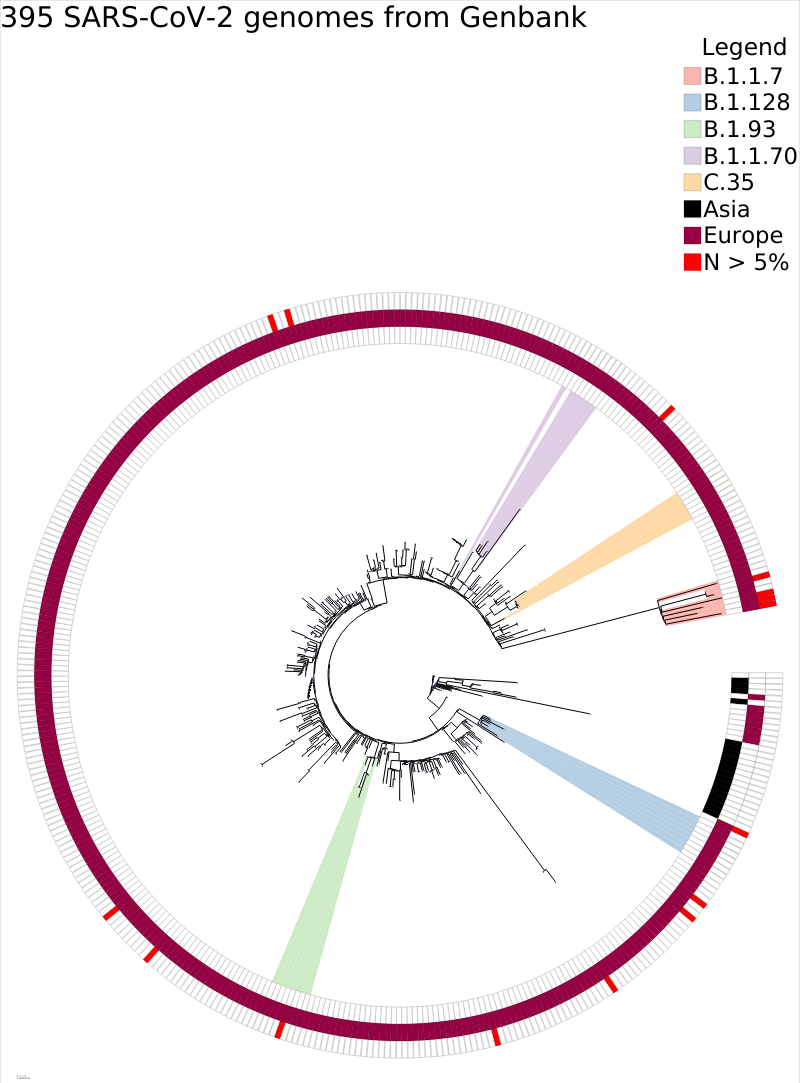

In [94]:
ts = q.tree_styler(mode='c', highlight_style='pastel', figure_margin=100,
              legend_title='Legend', title_fsize=125,
              title=f'{len(q)} SARS-CoV-2 genomes from Genbank',
              legend_nsize=100, legend_fsize=100,
              annotate_box_width=100, annotate_opacity_absent=1.0, annotate_border_width=1,
              annotate_guiding_lines=False, show_leaf_names=False)\
    .highlight(q.isa('B.1.1.7', isa_column='lineage', kind='dataframe'), legend_label='B.1.1.7')\
    .highlight(q.isa('B.1.128', isa_column='lineage', kind='dataframe'), legend_label='B.1.128')\
    .highlight(q.isa('B.1.93', isa_column='lineage', kind='dataframe'), legend_label='B.1.93')\
    .highlight(q.isa('B.1.1.70', isa_column='lineage', kind='dataframe'), legend_label='B.1.1.70')\
    .highlight(q.isa('C.35', isa_column='lineage', kind='dataframe'), legend_label='C.35')\
    .annotate(q.isa('Asia', isa_column='region', kind='dataframe'), legend_label='Asia', color_present='black')\
    .annotate(q.isa('Europe', isa_column='region', kind='dataframe'), legend_label='Europe', color_present='#980043')\
    .annotate(q_percent_n, legend_label='N > 5%', color_present='red')
ts.render(w=800)

## Save figure

In [95]:
# Do 'x = ' here to avoid printing unnecessary data in Jupyter
x = ts.render('figure.pdf', w=800)